In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile
import numpy as np
import wavio
import pandas as pd

base = '/media/michael/Seagate/engage/urban8k/UrbanSound8K/audio/'

metadata = pd.read_csv(base + '../metadata/UrbanSound8K.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
import glob
all_srs = []

for foldid in range(1, 11):
    
    folder = base + 'fold%d/' % foldid
    
    for fname in glob.glob(folder + '*.wav'):
        if fname.endswith('original.wav'): 
            continue

        sr, wav = wavfile.read(fname)
        all_srs.append(sr)

In [23]:
from collections import Counter
Counter(all_srs)

Counter({8000: 12,
         11024: 7,
         11025: 39,
         16000: 45,
         22050: 44,
         24000: 82,
         32000: 4,
         44100: 5370,
         48000: 2502,
         96000: 610,
         192000: 17})

/home/michael/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


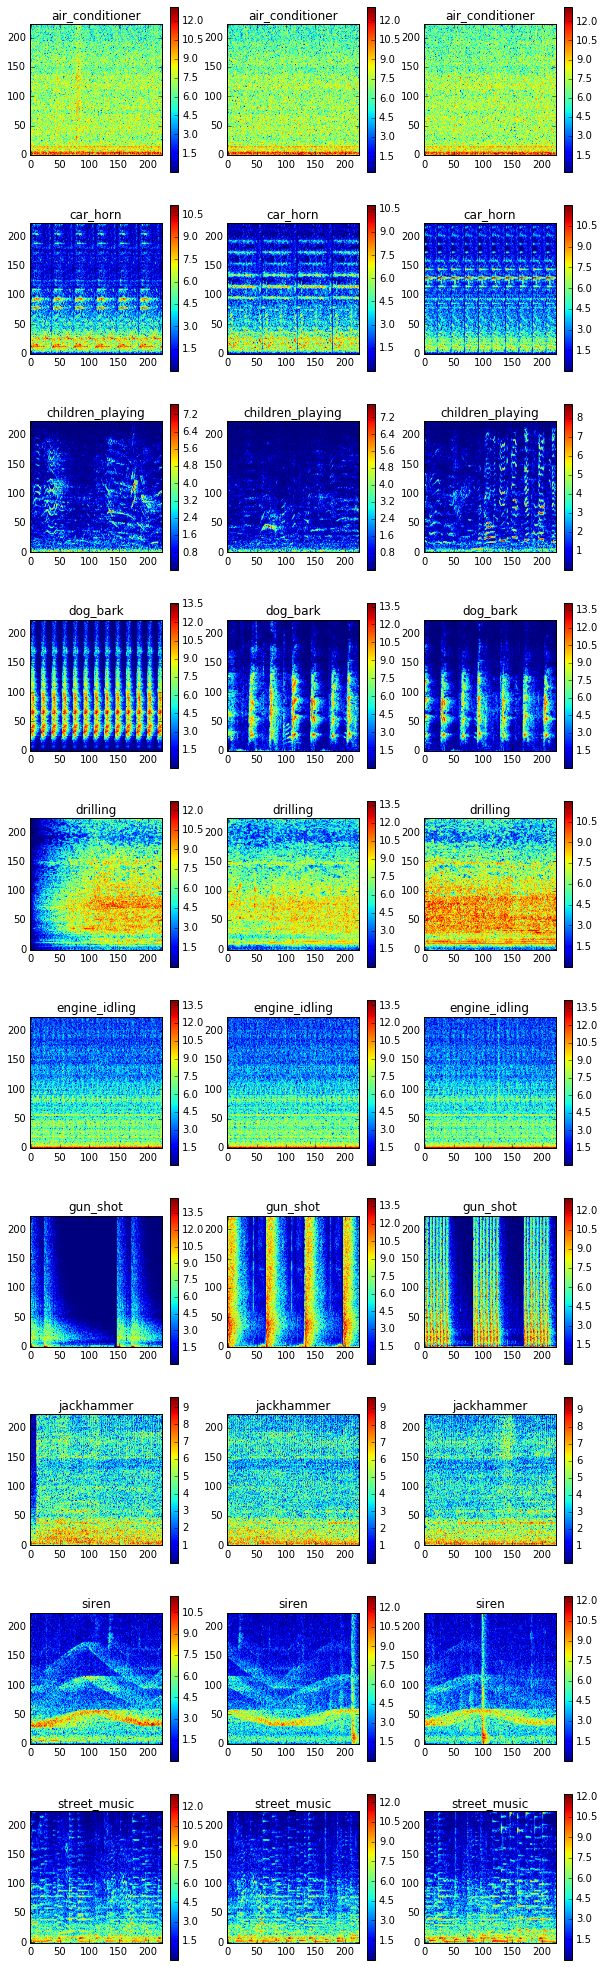

In [192]:
num_plotted_per_class = dict(zip(np.arange(10), np.zeros(10)))
max_per_class = 3
required_height = 224

from scipy.ndimage.interpolation import zoom

plt.figure(figsize=(10, 35))


for row in metadata.iterrows():
    this_class = row[1]['classID']
    
    if num_plotted_per_class[this_class] >= max_per_class:
        continue
    
    loadpath = base + 'fold%d/%s' % (row[1]['fold'], row[1]['slice_file_name'])

    # reading wav and force mono
    sr, wav = wavfile.read(loadpath)
    if wav.ndim == 2: wav = wav[:, 0]

    # force to be 4 seconds long
    repeats = np.ceil(4.0/(wav.shape[0]/float(sr)))
    required_units = sr * 4.0
    wav = np.tile(wav, repeats)[:required_units]

    # generating spectrogram and doing a low-pass filter
    spec = gen_mag_spectrogram_mod(wav, sr, 0.04)
    
    # padding or cropping to required shape
    if spec.shape[0] < required_height:
        pad = np.zeros((required_height - spec.shape[0], spec.shape[1]))
        spec = np.vstack((spec, pad))
    elif spec.shape[0] > required_height:
        spec = spec[:required_height]
    
    # resizing
    factor = (224.0/spec.shape[0], 224.0/spec.shape[1])
    spec = zoom(spec, factor, order=1)

    # plotting
    col = num_plotted_per_class[this_class]
    r = this_class
    idx = r * max_per_class + col + 1
    plt.subplot(10, max_per_class, idx)
    plt.imshow(spec)
    plt.gca().invert_yaxis()
    plt.title(row[1]['class'])    
    plt.colorbar()
    
    num_plotted_per_class[this_class] += 1
    if all(np.array(num_plotted_per_class.values()) == max_per_class):
        break

44100
22050
22050


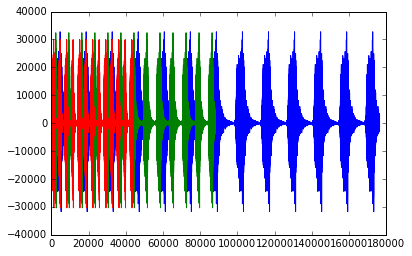

In [187]:
plt.plot(wav)
print sr

wav_halfrate = wav[::2]
sr_halfrate = sr / 2
plt.plot(wav_halfrate)
print sr_halfrate

wav_quartrate = wav_halfrate[::2]
sr_quartrate = sr_halfrate / 2
plt.plot(wav_quartrate)
print sr_halfrate

240


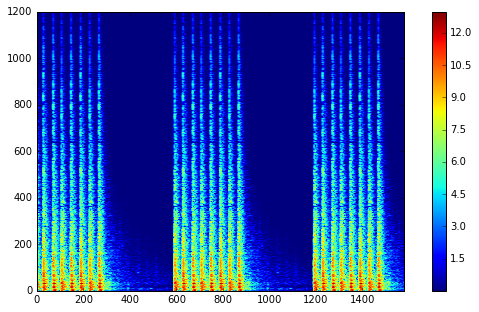

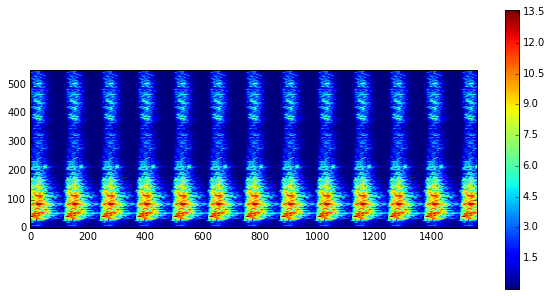

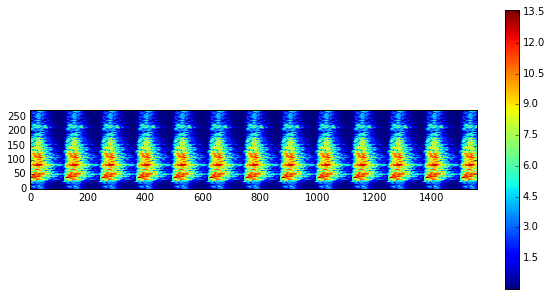

In [191]:
rate = 0.05
print required_height

spec = gen_mag_spectrogram_mod(wav, sr, rate)
plt.figure(figsize=(10,5))
plt.imshow(spec)
plt.gca().invert_yaxis()
plt.colorbar()

spec = gen_mag_spectrogram_mod(wav_halfrate, sr_halfrate, rate)
plt.figure(figsize=(10,5))
plt.imshow(spec)
plt.gca().invert_yaxis()
plt.colorbar()

spec = gen_mag_spectrogram_mod(wav_quartrate, sr_quartrate, rate)
plt.figure(figsize=(10,5))
plt.imshow(spec)
plt.gca().invert_yaxis()
plt.colorbar()